In [1]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import librosa.display
import IPython.display as ipd

## Reading Dataset

In [3]:
import pandas as pd
df1=pd.read_excel('Healthy_data.xlsx')
df2=pd.read_excel('Pathological_data.xlsx')
df=pd.concat([df1,df2], ignore_index=True)
df=df[df.Gender=='w']
df.head(10)

,Recording Id,Type,Gender,Age,Diagnosis Notes,Pathology,Audio
0,1,n,w,20,Normal,Normal,1-a_n.wav
1,2,n,w,22,Normal,Normal,2-a_n.wav
2,3,n,w,23,Normal,Normal,3-a_n.wav
5,6,n,w,20,Normal,Normal,6-a_n.wav
6,7,n,w,19,Normal,Normal,7-a_n.wav
7,27,n,w,20,Normal,Normal,27-a_n.wav
8,17,n,w,19,Normal,Normal,17-a_n.wav
9,8,n,w,19,Normal,Normal,8-a_n.wav
11,10,n,w,22,Normal,Normal,10-a_n.wav
12,2200,n,w,26,Normal,Normal,2200-a_n.wav


In [4]:
df.shape

(929, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 1489
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recording Id     929 non-null    int64 
 1   Type             929 non-null    object
 2   Gender           929 non-null    object
 3   Age              929 non-null    int64 
 4   Diagnosis Notes  866 non-null    object
 5   Pathology        929 non-null    object
 6   Audio            929 non-null    object
dtypes: int64(2), object(5)
memory usage: 58.1+ KB


In [6]:
type_gender_count = df.groupby(["Type","Gender"])[['Audio']].count()
type_gender_count

,,Audio
Type,Gender,
n,w,428
p,w,501


<Axes: xlabel='Type,Gender'>

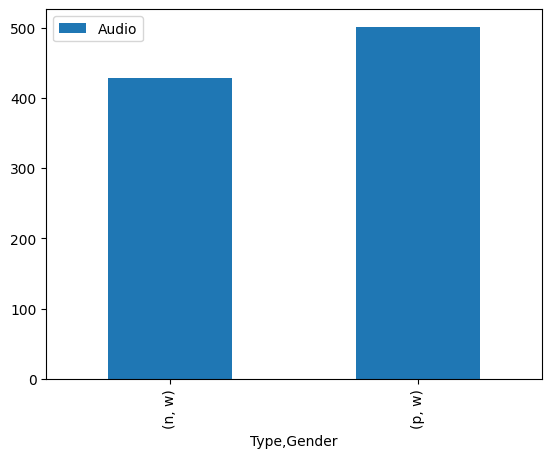

In [7]:
type_gender_count.plot.bar()

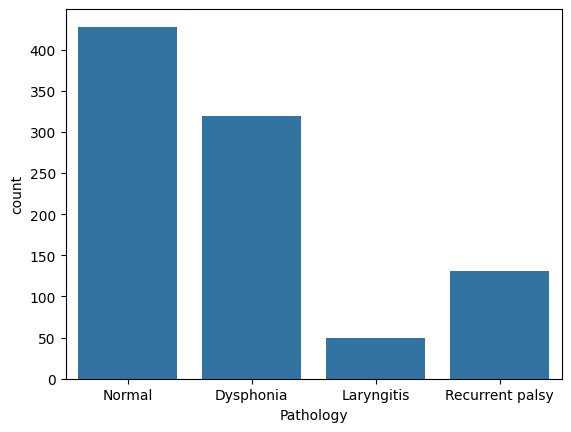

In [8]:
sns.countplot(x=df["Pathology"])
plt.show()

## Extract Features

In [9]:
## Extracting MFCC's for every audio file
import pandas as pd
import os

audio_dataset_path = 'Filtered_Audio_Dataset/'

In [10]:
def features_extraction(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr= sample_rate, n_mfcc=80) 
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [11]:
import numpy as np
from tqdm import tqdm 

extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = audio_dataset_path+row["Audio"]
    final_class_labels = row["Pathology"]
    data = features_extraction(file_name)
    extracted_features.append([data,final_class_labels])

929it [00:19, 48.49it/s]


In [12]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-261.49933, 114.805534, -72.840965, -0.931277...",Normal
1,"[-202.87245, 145.96022, -68.10183, -11.444383,...",Normal
2,"[-167.76535, 133.49133, -77.94643, -9.826728, ...",Normal
3,"[-205.02122, 137.12006, -66.55497, -12.496069,...",Normal
4,"[-217.24478, 145.07858, -100.58555, 2.7787614,...",Normal
5,"[-227.11813, 127.75929, -63.862732, -13.961372...",Normal
6,"[-196.28305, 113.32672, -99.92175, 1.0585632, ...",Normal
7,"[-207.56131, 135.24808, -61.779488, -17.637135...",Normal
8,"[-201.10626, 158.06732, -36.131306, 1.6452157,...",Normal
9,"[-277.55927, 161.18881, -30.51163, -16.397873,...",Normal


In [13]:
extracted_features_df.shape

(929, 2)

In [14]:
extracted_features_df["feature"][0]

array([-2.61499329e+02,  1.14805534e+02, -7.28409653e+01, -9.31277871e-01,
       -6.87778549e+01, -2.90463376e+00,  4.69877529e+00,  7.56695986e+00,
       -3.33707962e+01,  1.76828156e+01, -4.03612089e+00, -1.42697287e+01,
        9.20465565e+00, -2.80942898e+01, -1.00394077e+01, -1.63144569e+01,
       -9.73753095e-01, -4.31138134e+00, -9.75323021e-01, -1.19480648e+01,
        4.30604649e+00, -9.05258274e+00,  8.25730264e-02,  4.08039131e+01,
        2.39141750e+01,  6.14854851e+01,  3.20326614e+01,  8.02177048e+00,
       -2.74810147e+00, -9.03449821e+00,  4.29856348e+00, -1.17523634e+00,
        1.33330641e+01, -6.40946245e+00, -1.52622843e+01, -5.44703770e+00,
        1.03529129e+01, -3.11023307e+00, -8.39600277e+00, -7.93014669e+00,
       -5.57793570e+00,  1.33628864e+01, -4.67780113e+00, -1.73656483e+01,
       -1.20797033e+01,  3.30997729e+00, -6.23456812e+00,  1.79914856e+00,
        1.81635227e+01,  3.11546078e+01,  3.39731293e+01,  2.36189723e+00,
        3.56650442e-01,  

In [15]:
## Label Encoding
dummy_data = pd.get_dummies(extracted_features_df['class'])

In [16]:
dummy_data

,Dysphonia,Laryngitis,Normal,Recurrent palsy
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
924,False,False,False,True
925,False,False,False,True
926,False,False,False,True
927,False,False,False,True


In [17]:
x=np.array(extracted_features_df['feature'].values.tolist())
y=dummy_data

In [18]:
x.shape

(929, 80)

In [19]:
y.shape

(929, 4)

In [20]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify= y, test_size=0.2,random_state=0)

In [21]:
x_train.shape

(743, 80)

In [22]:
x_test.shape

(186, 80)

In [23]:
y_train.shape

(743, 4)

In [24]:
y_test.shape

(186, 4)

## Model Training

In [25]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [27]:
## No. of classes
num_labels=y.shape[1]
num_labels

4

In [28]:
model=Sequential()
## first layer
model.add(Dense(256,input_shape=(80,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## third layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               20736     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               1

In [31]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=150
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='/audio_classification.hdf5', verbose=1, save_best_only=True)
start=datetime.now() 

model.fit(x_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test,y_test), callbacks=[checkpointer])
duration=datetime.now()-start

print("Training completed in time: ",duration)

Epoch 1/150
19/24 [======================>.......] - ETA: 0s - loss: 16.6896 - accuracy: 0.3553
Epoch 1: val_loss improved from inf to 4.00914, saving model to /audio_classification.hdf5
24/24 [==============================] - 2s 36ms/step - loss: 15.7269 - accuracy: 0.3580 - val_loss: 4.0091 - val_accuracy: 0.4624
Epoch 2/150
24/24 [==============================] - ETA: 0s - loss: 8.2502 - accuracy: 0.3661
Epoch 2: val_loss improved from 4.00914 to 1.56141, saving model to /audio_classification.hdf5


C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 0s 9ms/step - loss: 8.2502 - accuracy: 0.3661 - val_loss: 1.5614 - val_accuracy: 0.4677
Epoch 3/150
12/24 [==============>...............] - ETA: 0s - loss: 5.4618 - accuracy: 0.4167
Epoch 3: val_loss improved from 1.56141 to 1.25067, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 5.1394 - accuracy: 0.3917 - val_loss: 1.2507 - val_accuracy: 0.4839
Epoch 4/150
20/24 [========================>.....] - ETA: 0s - loss: 3.7309 - accuracy: 0.4109
Epoch 4: val_loss improved from 1.25067 to 1.16445, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 3.6661 - accuracy: 0.4145 - val_loss: 1.1645 - val_accuracy: 0.4462
Epoch 5/150
22/24 [==========================>...] - ETA: 0s - loss: 2.9739 - accuracy: 0.3594
Epoch 5: val_loss did not improve from 1.16445
24/24 [==============================] - 0s 8ms/step - loss: 2.9403 - accuracy: 0.3580 - v

Epoch 32/150
22/24 [==========================>...] - ETA: 0s - loss: 1.1107 - accuracy: 0.5014
Epoch 32: val_loss did not improve from 1.14230
24/24 [==============================] - 0s 7ms/step - loss: 1.1086 - accuracy: 0.5074 - val_loss: 1.1430 - val_accuracy: 0.4946
Epoch 33/150
20/24 [========================>.....] - ETA: 0s - loss: 1.1940 - accuracy: 0.4953
Epoch 33: val_loss improved from 1.14230 to 1.10716, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 11ms/step - loss: 1.1859 - accuracy: 0.5047 - val_loss: 1.1072 - val_accuracy: 0.5108
Epoch 34/150
18/24 [=====================>........] - ETA: 0s - loss: 1.1444 - accuracy: 0.5226
Epoch 34: val_loss did not improve from 1.10716
24/24 [==============================] - 0s 9ms/step - loss: 1.1522 - accuracy: 0.5047 - val_loss: 1.1376 - val_accuracy: 0.4839
Epoch 35/150
24/24 [==============================] - ETA: 0s - loss: 1.1100 - accuracy: 0.5034
Epoch 35: val_loss did not improve f

Epoch 61/150
19/24 [======================>.......] - ETA: 0s - loss: 0.9978 - accuracy: 0.5691
Epoch 61: val_loss improved from 1.04847 to 1.03542, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 11ms/step - loss: 0.9812 - accuracy: 0.5787 - val_loss: 1.0354 - val_accuracy: 0.5914
Epoch 62/150
20/24 [========================>.....] - ETA: 0s - loss: 1.0055 - accuracy: 0.5719
Epoch 62: val_loss did not improve from 1.03542
24/24 [==============================] - 0s 8ms/step - loss: 1.0126 - accuracy: 0.5572 - val_loss: 1.0450 - val_accuracy: 0.5538
Epoch 63/150
21/24 [=========================>....] - ETA: 0s - loss: 1.0037 - accuracy: 0.6101
Epoch 63: val_loss did not improve from 1.03542
24/24 [==============================] - 0s 8ms/step - loss: 1.0059 - accuracy: 0.5949 - val_loss: 1.0617 - val_accuracy: 0.5215
Epoch 64/150
20/24 [========================>.....] - ETA: 0s - loss: 0.9697 - accuracy: 0.5906
Epoch 64: val_loss did not improve f

Epoch 90/150
17/24 [====================>.........] - ETA: 0s - loss: 0.8868 - accuracy: 0.6158
Epoch 90: val_loss improved from 1.00690 to 1.00597, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 0.8719 - accuracy: 0.6285 - val_loss: 1.0060 - val_accuracy: 0.5645
Epoch 91/150
17/24 [====================>.........] - ETA: 0s - loss: 0.8460 - accuracy: 0.6434
Epoch 91: val_loss did not improve from 1.00597
24/24 [==============================] - 0s 9ms/step - loss: 0.8535 - accuracy: 0.6366 - val_loss: 1.0117 - val_accuracy: 0.5860
Epoch 92/150
19/24 [======================>.......] - ETA: 0s - loss: 0.8402 - accuracy: 0.6266
Epoch 92: val_loss did not improve from 1.00597
24/24 [==============================] - 0s 8ms/step - loss: 0.8284 - accuracy: 0.6339 - val_loss: 1.0288 - val_accuracy: 0.5591
Epoch 93/150
17/24 [====================>.........] - ETA: 0s - loss: 0.8377 - accuracy: 0.6434
Epoch 93: val_loss did not improve f

24/24 [==============================] - 0s 9ms/step - loss: 0.7049 - accuracy: 0.7295 - val_loss: 1.0831 - val_accuracy: 0.5430
Epoch 120/150
18/24 [=====================>........] - ETA: 0s - loss: 0.6797 - accuracy: 0.7170
Epoch 120: val_loss did not improve from 1.00305
24/24 [==============================] - 0s 9ms/step - loss: 0.6812 - accuracy: 0.7147 - val_loss: 1.0744 - val_accuracy: 0.5269
Epoch 121/150
19/24 [======================>.......] - ETA: 0s - loss: 0.7190 - accuracy: 0.7089
Epoch 121: val_loss did not improve from 1.00305
24/24 [==============================] - 0s 8ms/step - loss: 0.7036 - accuracy: 0.7133 - val_loss: 1.0528 - val_accuracy: 0.5645
Epoch 122/150
22/24 [==========================>...] - ETA: 0s - loss: 0.6709 - accuracy: 0.7145
Epoch 122: val_loss did not improve from 1.00305
24/24 [==============================] - 0s 7ms/step - loss: 0.6673 - accuracy: 0.7201 - val_loss: 1.0803 - val_accuracy: 0.5161
Epoch 123/150
23/24 [=========================

In [ ]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[0])

: 

In [33]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [34]:
y_pred

array([[1.77128153e-04, 5.18115667e-06, 9.99817312e-01, 4.59028286e-07],
       [5.50034344e-01, 7.07388222e-02, 2.64443815e-01, 1.14783049e-01],
       [6.99112058e-01, 1.34799063e-01, 1.02776140e-01, 6.33127168e-02],
       [2.77265549e-01, 2.59039132e-03, 7.12098241e-01, 8.04577768e-03],
       [4.63720232e-01, 1.56213641e-01, 2.93880738e-02, 3.50678086e-01],
       [3.36718738e-01, 1.10367119e-01, 2.58333497e-02, 5.27080715e-01],
       [4.81332958e-01, 6.72308356e-02, 3.63754660e-01, 8.76815319e-02],
       [3.10921413e-03, 2.21860060e-03, 9.94614184e-01, 5.80458182e-05],
       [5.12891293e-01, 2.25305408e-02, 4.19385791e-01, 4.51923423e-02],
       [2.81982094e-01, 2.47627981e-02, 5.87515473e-01, 1.05739631e-01],
       [4.25583303e-01, 1.06832363e-01, 1.72803730e-01, 2.94780642e-01],
       [1.31637156e-01, 6.96926890e-03, 8.27366292e-01, 3.40273008e-02],
       [4.70108166e-02, 5.60868764e-03, 9.45570707e-01, 1.80979434e-03],
       [1.75659254e-01, 1.26358494e-02, 7.89468765e

In [35]:
y_test.values

array([[False, False,  True, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [False, False, False,  True],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [ True, False, False, False],
       [False, False,  True, False],
       [ True, False, False, False],
       [False,  True, False, False],
 

6/6 [==============================] - 0s 7ms/step


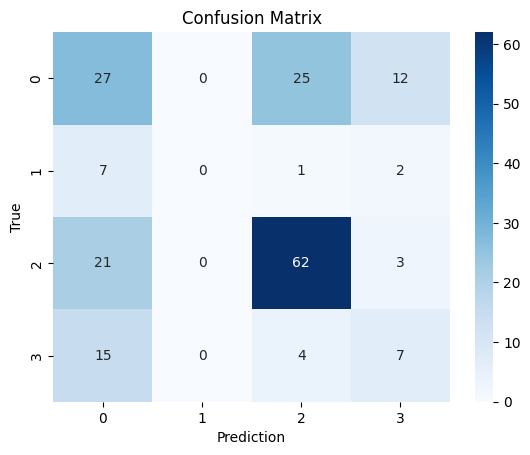

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

#Plot confusion matrix
sns.heatmap( conf_matrix, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model Evaluation

In [36]:
filename = 'Male_Female_Healthy_Dataset/1004-a_n.wav'

In [37]:
feature_df = pd.DataFrame(features_extraction(filename)).transpose()

In [38]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-182.332748,138.173431,-84.687096,10.047243,-48.317905,9.40225,2.296518,4.65991,-13.330125,9.432405,...,-3.532734,1.599048,2.740876,-0.671063,1.497601,-0.059052,-2.493449,-0.113035,5.037437,-0.590547


In [39]:
features = np.array(feature_df.values.tolist())

In [40]:
features.shape

(1, 80)

In [41]:
model.predict(features)

1/1 [==============================] - 0s 30ms/step


array([[0.36105075, 0.14097366, 0.17349696, 0.3244786 ]], dtype=float32)